<a href="https://colab.research.google.com/github/Aashish2502/EDA_Suicides/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**



#**Data Wangling**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/who_suicide_statistics.csv')

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [ ]:
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [ ]:
df=df.fillna(0)


In [ ]:
df.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [ ]:
columns = ['suicides_no', 'population']
for x in columns:
  df[x] = df[x].replace(0,np.NAN)
  df[x] = df[x].fillna(df[x].mean())

df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,249.106328,277900.0
1,Albania,1985,female,25-34 years,249.106328,246800.0
2,Albania,1985,female,35-54 years,249.106328,267500.0
3,Albania,1985,female,5-14 years,249.106328,298300.0
4,Albania,1985,female,55-74 years,249.106328,138700.0


In [ ]:
df['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [ ]:
df['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982])

In [ ]:
df['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [ ]:
df['country'].nunique()

141

#**Exploratory Analysis and Visualization**
 Let us explore the data and answer some of the following questions using some visualizations and exploratory analysis techniques:

*   Which year has the most and least suicides ?
*    Which country has the most and least suicides ?
*  Are certain age groups more inclined to suicide ?
*  What is the relationship between gender and the number of suicides ?





##Question 1: Which year has the most and least suicides ?

In [ ]:
grp_yr = df.groupby('year')['suicides_no'].mean()

Text(0.5, 1.0, 'Suicides vs Year')

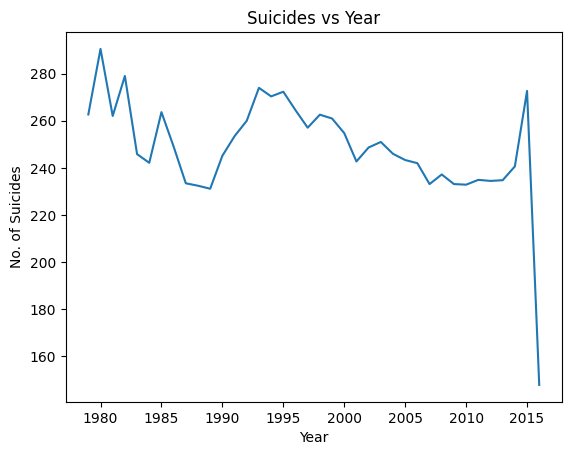

In [ ]:
grp_yr.plot()

plt.xlabel("Year")
plt.ylabel("No. of Suicides")
plt.title('Suicides vs Year')

In [ ]:
min_year = df['suicides_no'].idxmin()
min_ = pd.DataFrame(df.loc[min_year,:])

In [ ]:
max_year = df['suicides_no'].idxmax()
max_ = pd.DataFrame(df.loc[max_year,:])

In [ ]:
print("The highest suicides were recorded in the year :", df['year'][max_year])
print("The least suicides were recorded in the year   :", df['year'][min_year])

The highest suicides were recorded in the year : 1994
The least suicides were recorded in the year   : 1987


In [ ]:
pd.concat([min_,max_],axis=1)

,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,35600.0,19044200.0


##Question 2: Which country has the most and least suicides ?

In [ ]:
grp_con = df.groupby('country')['suicides_no'].mean()

In [ ]:
pd.DataFrame(grp_con)

,suicides_no
country,
Albania,116.456050
Anguilla,247.680430
Antigua and Barbuda,241.725187
Argentina,211.400901
Armenia,63.298366
...,...
Uruguay,52.384487
Uzbekistan,132.084691
Venezuela (Bolivarian Republic of),76.833333


In [ ]:
print("The highest suicides were recorded in the country :", df['country'][max_year])
print("The least suicides were recorded in the country   :", df['country'][min_year])

The highest suicides were recorded in the country : Russian Federation
The least suicides were recorded in the country   : Albania


<Axes: title={'center': 'Country vs. Suicides'}, xlabel='country', ylabel='Suicides'>

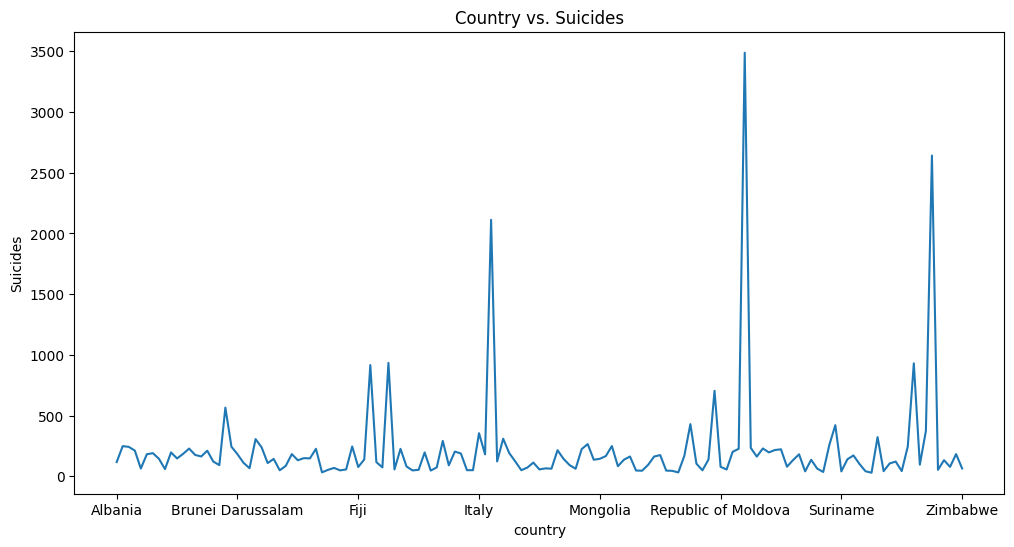

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Suicides')
plt.title('Country vs. Suicides')

grp_con.plot()



---



###Population must also be taken into consideration to standardize the calculation and determine the highest and lowest **Suicides Per Population* (SPP)**



**Example of Feature Engineering*




In [ ]:
df['SPP'] = df['suicides_no']/df['population']


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,SPP
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931
3,Albania,1985,female,5-14 years,249.106328,298300.0,0.000835
4,Albania,1985,female,55-74 years,249.106328,138700.0,0.001796


In [ ]:
min_ssp = df['SPP'].idxmin()
low = pd.DataFrame(df.loc[min_ssp,:])

In [ ]:
max_ssp = df['SPP'].idxmax()
high = pd.DataFrame(df.loc[max_ssp,:])

In [ ]:
print("The highest suicides were recorded in the country :", df['country'][max_ssp])
print("The least suicides were recorded in the country   :", df['country'][min_ssp])

The highest suicides were recorded in the country : Rodrigues
The least suicides were recorded in the country   : Egypt


In [ ]:
pd.concat([high,low], axis=1)

,32351,12993
country,Rodrigues,Egypt
year,2004,2005
sex,male,male
age,75+ years,5-14 years
suicides_no,249.106328,1.0
population,259.0,9543088.0
SPP,0.9618,0.0


##Question 3: Are certain age groups more inclined to suicide ?

In [ ]:
df['Age_Category'] = df['age'].str[:2]
df['Age_Category'] = df['Age_Category'].map(lambda x : x.replace('-',''))
df['Age_Category'] = df['Age_Category'].astype(int)

In [ ]:
df['Age_Category'].unique()

array([15, 25, 35,  5, 55, 75])

In [ ]:
def Age_Cat(x):
  if x>60:
    return 'Elderly'
  elif x>=35:
    return 'Middle-Aged'
  elif x>=20:
    return 'Adult'
  else:
    return 'Adolscent'

In [ ]:
df['Age_Category'] = df['Age_Category'].map(lambda x : Age_Cat(x))

In [ ]:
df.tail(3)

,country,year,sex,age,suicides_no,population,SPP,Age_Category
43773,Zimbabwe,1990,male,5-14 years,6.0,1.664091e+06,0.000004,Adolscent
43774,Zimbabwe,1990,male,55-74 years,74.0,1.664091e+06,0.000044,Middle-Aged
43775,Zimbabwe,1990,male,75+ years,13.0,1.664091e+06,0.000008,Elderly


Text(5.069444444444445, 0.5, 'No. of Suicides')

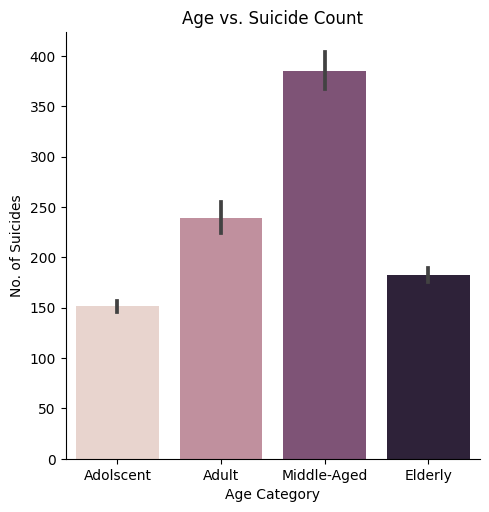

In [ ]:
sns.catplot(x="Age_Category", y="suicides_no",palette="ch:.03", kind="bar",data=df);

plt.title('Age vs. Suicide Count')
plt.xlabel('Age Category')
plt.ylabel('No. of Suicides')

##Question 4: What is the relationship between gender and the number of suicides ?

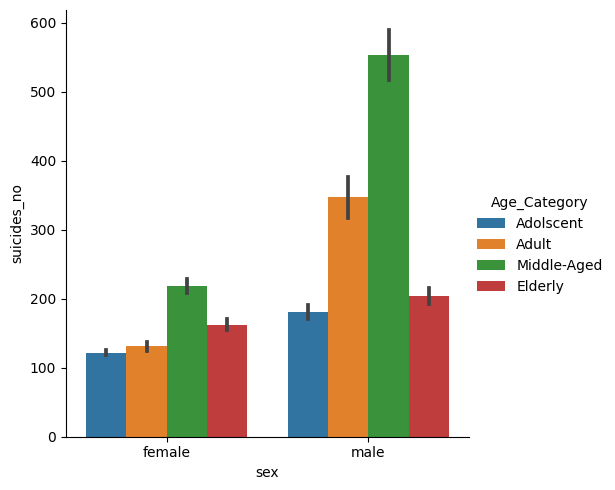

In [ ]:
sns.catplot(x="sex", y="suicides_no", hue="Age_Category", kind="bar", data=df);

In [ ]:
grp_gen = df.groupby('sex')['suicides_no'].mean()

In [ ]:
gen_pd = pd.DataFrame(grp_gen)
gen_pd['sex'] =  ['female', 'male']

Text(0, 0.5, 'Suicides')

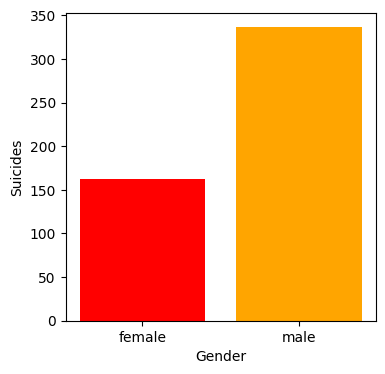

In [ ]:
plt.figure(figsize=(4, 4))
plt.bar(gen_pd['sex'], gen_pd['suicides_no'], color=['red', 'orange'])

plt.xlabel('Gender')
plt.ylabel('Suicides')